In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [26]:
#IMPORT TSLA closing Prices CSV
csv_path = Path("TSLA-RNN.csv")
tsla_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
tsla_df = tsla_df.sort_index()
tsla_df.head()

,Close
Date,
2010-06-29 00:00:00,4.78
2010-06-30 16:00:00,4.77
2010-07-01 16:00:00,4.39
2010-07-02 16:00:00,3.84
2010-07-06 16:00:00,3.22


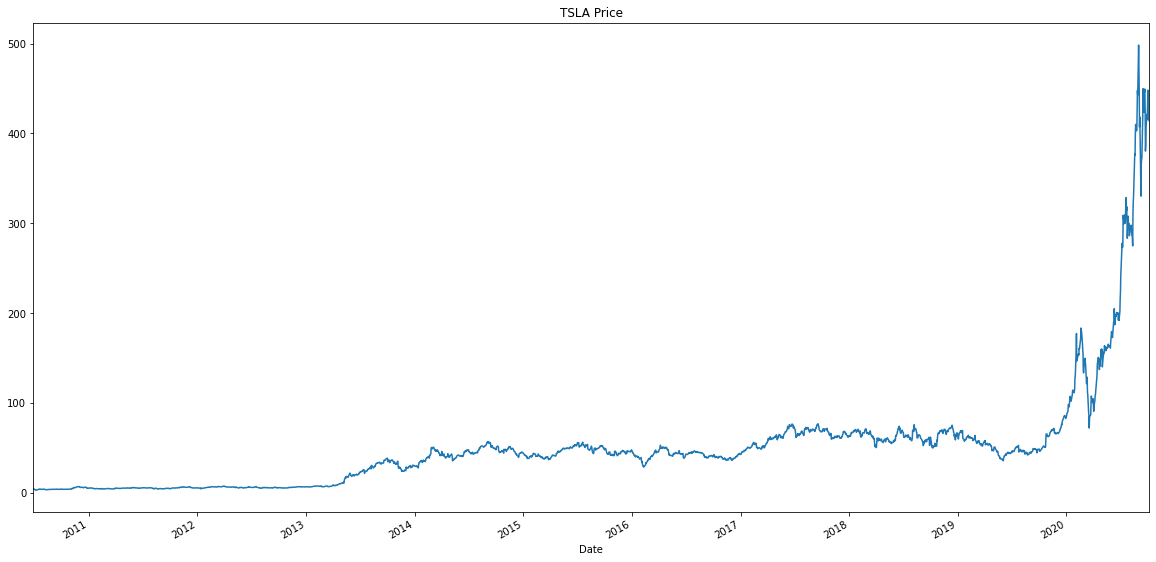

In [27]:
# Plot just the "Close" column from the dataframe:
tsla_df.Close.plot(title="TSLA Price", figsize=(20,10))

In [28]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Close" price into two separate series:
y_noise, y_trend = sm.tsa.filters.hpfilter(tsla_df['Close'])

In [32]:
#Create a dataframe of just the Closing price, and add columns for "noise" and "trend" series from above: (Part 2)
tsla_df['Noise'] = y_noise
tsla_df['Trend'] = y_trend
tsla_df.head()

,Close,Noise,Trend
Date,,,
2010-06-29 00:00:00,4.78,0.742357,4.037643
2010-06-30 16:00:00,4.77,0.753920,4.016080
2010-07-01 16:00:00,4.39,0.395019,3.994981
2010-07-02 16:00:00,3.84,-0.135280,3.975280
2010-07-06 16:00:00,3.22,-0.738162,3.958162


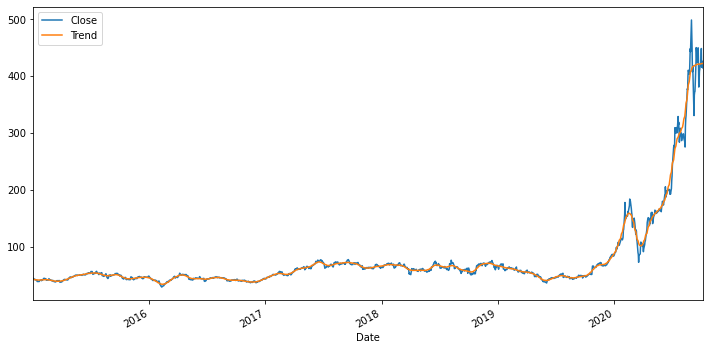

In [33]:
# Plot the Close Price vs. the Trend for 2015 to the present
tsla_chart = tsla_df[['Close', 'Trend']]
tsla_chart.loc['2015':].plot(figsize=(12,6))

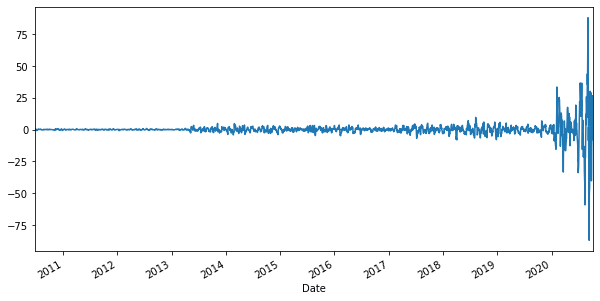

In [34]:
# Plot the Close Noise
y_noise.plot(figsize=(10,5))

In [35]:
# Create a series using "Close" price percentage returns, drop any nan"s, and check the results:
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (tsla_df[["Close"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Close
Date,
2020-09-30 16:00:00,2.371919
2020-10-01 16:00:00,4.463765
2020-10-02 16:00:00,-7.379061
2020-10-05 16:00:00,2.551254
2020-10-06 16:00:00,-2.748544


In [36]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = ARMA(returns.values, order=(2, 1))

# Fit the model and assign it to a variable called results
results = model.fit()

In [37]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2586
Model:                     ARMA(2, 1)   Log Likelihood               -6943.460
Method:                       css-mle   S.D. of innovations              3.547
Date:                Sun, 18 Oct 2020   AIC                          13896.920
Time:                        13:16:27   BIC                          13926.209
Sample:                             0   HQIC                         13907.535
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2353      0.070      3.370      0.001       0.098       0.372
ar.L1.y        0.7312      0.655      1.116      0.264      -0.553       2.015
ar.L2.y       -0.0077      0.020     -0.385      0.700      -0.047       0.031
ma.L1.y       -0.7233      0.655     -1.105      0.269      -2.007       0.560
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3879           +0.0000j            1.3879            0.0000
AR.2           93.5897           +0.0000j           93.5897            0.0000
MA.1            1.3826           +0.0000j            1.3826            0.0000
-----------------------------------------------------------------------------
"""

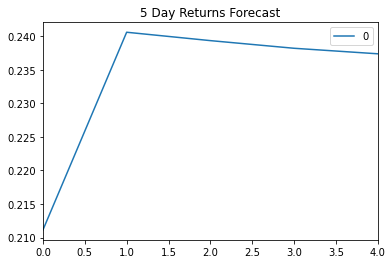

In [38]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

##ARIMA

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
# Estimate and ARIMA Model:
# ARIMA(df, order=(p, d, q))
model = ARIMA(tsla_df.Close, order=(5,1,1))

# Fit the model
results = model.fit()

/Users/edwardmcmillan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/edwardmcmillan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2586
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7326.592
Method:                       css-mle   S.D. of innovations              4.113
Date:                Sun, 18 Oct 2020   AIC                          14669.184
Time:                        13:18:21   BIC                          14716.047
Sample:                             1   HQIC                         14686.168
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1578      0.068      2.310      0.021       0.024       0.292
ar.L1.D.Close     0.1941      0.067      2.909      0.004       0.063       0.325
ar.L2.D.Close     0.0799      0.020      4.049      0.000       0.041       0.119
ar.L3.D.Close     0.1061      0.020      5.303      0.000       0.067       0.145
ar.L4.D.Close    -0.0492      0.021     -2.327      0.020      -0.091      -0.008
ar.L5.D.Close    -0.2159      0.020    -10.704      0.000      -0.255      -0.176
ma.L1.D.Close    -0.2527      0.067     -3.763      0.000      -0.384      -0.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1049           -0.6479j            1.2809           -0.0844
AR.2            1.1049           +0.6479j            1.2809            0.0844
AR.3           -0.4595           -1.2837j            1.3634           -0.3047
AR.4           -0.4595           +1.2837j            1.3634            0.3047
AR.5           -1.5185           -0.0000j            1.5185           -0.5000
MA.1            3.9574           +0.0000j            3.9574            0.0000
-----------------------------------------------------------------------------
"""

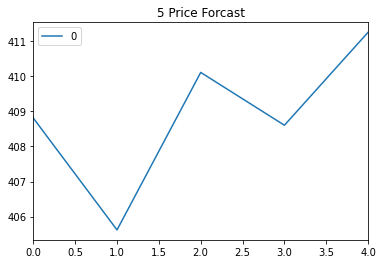

In [43]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title='5 Price Forcast')

##GARCH

In [44]:
from arch import arch_model

In [45]:
# Estimate a GARCH model:
model = arch_model(returns, mean='Zero', vol='GARCH', p=2, q=1)

# Fit the model
garch_results = model.fit(disp='off')

In [47]:
# Summarize the model results
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6772.41
Distribution:                  Normal   AIC:                           13552.8
Method:            Maximum Likelihood   BIC:                           13576.2
                                        No. Observations:                 2586
Date:                Sun, Oct 18 2020   Df Residuals:                     2582
Time:                        13:18:44   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0662  5.592e-02      1.184      0.236   [-4.340e-02,  0.176]
alpha[1]       0.0247  1.256e-02      1.964  4.951e-02  [5.276e-05,4.928e-02]
alpha[2]   3.4325e-08  1.693e-02  2.027e-06      1.000 [-3.318e-02,3.318e-02]
beta[1]        0.9703  1.400e-02     69.298      0.000      [  0.943,  0.998]
=============================================================================

Covariance estimator: robust
"""

In [48]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-10-06'

In [49]:
# Create a 3 day forecast of volatility
forecast_horizon = 3
# Start the forecast using the last_day calculated above
forecasts = garch_results.forecast(start='2020-10-06', horizon=forecast_horizon)

In [50]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3
Date,,,
2020-10-06 16:00:00,90.703881,90.567248,90.4311


In [51]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-10-06 16:00:00
h.1,90.703881
h.2,90.567248
h.3,90.431100


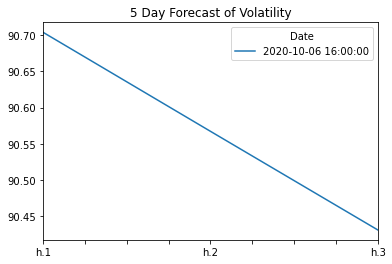

In [52]:
# Plot the final forecast
final.plot(title=('5 Day Forecast of Volatility'))